In [7]:
import os

import matplotlib.pyplot as plt
import numpy as np

In [8]:
path_figure = os.path.join('svg', 'figureS24_rdm_predicted_parallel.svg')

In [9]:
parity =    np.array([[1, 0, 1, 0, 1, 0, 1, 0, 1, 0]])
value =     np.array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]])
prime =     np.array([[0, 0, 1, 1, 0, 1, 0, 1, 0, 0]])
fibonacci = np.array([[1, 1, 1, 1, 0, 1, 0, 0, 1, 0]])
mul3 =      np.array([[0, 0, 0, 1, 0, 0, 1, 0, 0, 1]])

vowel =        np.array([[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])
position =     np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [24]:
def compute_rdm_parallel(tasks):
    num_tasks = len(tasks)
    self_congruency_tasks = []
    for task in tasks:
        self_congruency_task = (task.T @ task) + (1 - task).T @ (1 - task)
        self_congruency_tasks.append(self_congruency_task)

    correlation_matrix = np.zeros_like(self_congruency_tasks[0])
    for self_congruency_task in self_congruency_tasks:
        correlation_matrix += self_congruency_task

    correlation_matrix = correlation_matrix / num_tasks

    return (1 - correlation_matrix) / 2

In [25]:
rdm_parallel_2_letters = compute_rdm_parallel([vowel, position])
rdm_parallel_2_digits = compute_rdm_parallel([parity, value])
rdm_parallel_5 = compute_rdm_parallel([parity, value, prime, fibonacci, mul3])


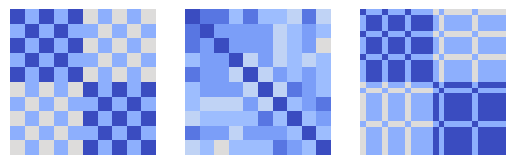

In [46]:
fig, ax = plt.subplots(1, 3)

ax[0].imshow(rdm_parallel_2_digits, vmin=0, vmax=1, cmap='coolwarm')
ax[0].axis('off')

ax[1].imshow(rdm_parallel_5, vmin=0, vmax=1, cmap='coolwarm')
ax[1].axis('off')

ax[2].imshow(rdm_parallel_2_letters, vmin=0, vmax=1, cmap='coolwarm')
ax[2].axis('off')

fig.savefig(path_figure)
plt.show()